### 1. Importación de Librerias

In [1]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.keras

### 2. Lectura del data frame

In [2]:
file_path = 'banklimpio.csv'
df = pd.read_csv(file_path, sep=',')
df.shape

(77019, 84)

In [3]:
df

,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estu_edad,cole_area_ubicacion_URBANO,cole_bilingue_N,...,fami_personashogar_Tres,fami_personashogar_Una,fami_tieneautomovil_No,fami_tieneautomovil_Si,fami_tienecomputador_No,fami_tienecomputador_Si,fami_tieneinternet_No,fami_tieneinternet_Si,fami_tienelavadora_No,fami_tienelavadora_Si
0,20224,48.0,58.0,45.0,50.0,42.0,243.0,19,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20224,52.0,47.0,33.0,43.0,53.0,223.0,20,1,1,...,0,0,1,0,0,1,0,1,0,1
2,20224,62.0,68.0,66.0,61.0,61.0,319.0,20,1,1,...,0,0,1,0,1,0,0,1,0,1
3,20224,58.0,44.0,37.0,45.0,45.0,220.0,19,1,1,...,0,0,1,0,1,0,1,0,1,0
4,20224,72.0,70.0,66.0,65.0,60.0,329.0,18,1,1,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77014,20142,48.0,52.0,45.0,50.0,57.0,254.0,26,1,1,...,0,0,1,0,1,0,1,0,1,0
77015,20142,52.0,62.0,52.0,51.0,65.0,285.0,25,1,1,...,1,0,1,0,1,0,0,1,1,0
77016,20172,38.0,42.0,29.0,44.0,32.0,184.0,25,1,1,...,0,0,1,0,0,1,0,1,0,1
77017,20194,37.0,41.0,32.0,40.0,46.0,198.0,24,1,1,...,0,0,1,0,1,0,1,0,1,0


### 3. Separación de los datos de entrenamiento y prueba

In [4]:
X = df.drop(columns=['punt_global', 'periodo', 'punt_ingles', 'punt_matematicas', 
                     'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica'])  # Variables explicativas
y = df['punt_global']  # Variable de respuesta

# Separar en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Verificación de las dimensiones para asegurarnos de que la separación fue correcta
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (61615, 77)
Dimensiones de X_test: (15404, 77)
Dimensiones de y_train: (61615,)
Dimensiones de y_test: (15404,)


### 4. Modelo

In [44]:
mlflow.set_experiment('Experimento con capas')

2024/12/02 14:26:02 INFO mlflow.tracking.fluent: Experiment with name 'Experimento con capas' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/higut/Downloads/Proyecto3/Repositoriopro3/mlruns/541022547613134065', creation_time=1733167563099, experiment_id='541022547613134065', last_update_time=1733167563099, lifecycle_stage='active', name='Experimento con capas', tags={}>

#### Modelo con 10 capas: 1 de normalización, 1 de salida, 8 capas ocultas con 64  neuronas cada una

In [45]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001
    epochs = 100
    Capas = 10
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    tf.keras.layers.Normalization
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))
    X_train[:1]

    M1 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
      ])

    M1.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.0001))

    history = M1.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=100)
    
    #Registrar metricas
    mlflow.keras.log_model(M1, "model")
    loss = M1.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 104.9968 - val_loss: 13.9683
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 12.5862 - val_loss: 9.7020
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.0795 - val_loss: 7.8731
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.2563 - val_loss: 6.6230
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.1551 - val_loss: 5.7166
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.3782 - val_loss: 5.2647
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.8251 - val_loss: 4.7472
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.3448 - val_loss: 4.4068
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.0262 - val_loss: 4.0997
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.7478 - val_loss: 3.8310
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.5024 - val_loss: 3.6830
Epoch 12/100
1

2024/12/02 14:39:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/02 14:43:04 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\higut\AppData\Local\Temp\tmp12me7_8l\model, flavor: keras). Fall back to return ['keras==3.5.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/02 14:43:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2557.7793


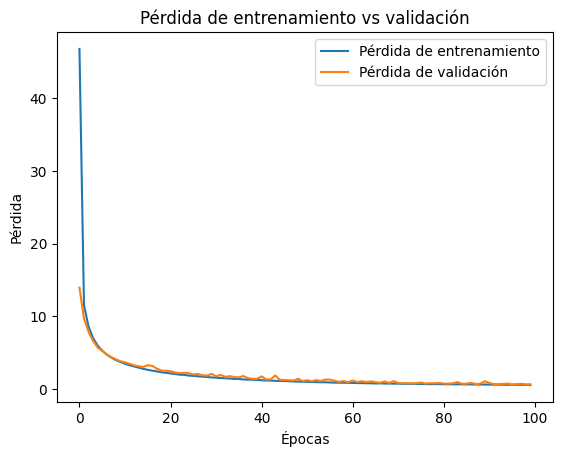

In [46]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


#### Modelo con 7 capas: 1 de normalización, 1 de salida, 5 capas ocultas con 64  neuronas cada una

In [47]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001
    epochs = 100
    Capas = 7
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    tf.keras.layers.Normalization
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))
    X_train[:1]

    M2 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
      ])

    M2.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.0001))

    history = M2.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=100)
    
    #Registrar metricas
    mlflow.keras.log_model(M2, "model two")
    loss = M2.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 130.7188 - val_loss: 14.6256
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 13.2339 - val_loss: 10.6663
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 9.8674 - val_loss: 8.9252
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.4049 - val_loss: 7.9889
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 7.3923 - val_loss: 7.0868
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.7562 - val_loss: 6.5551
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.1809 - val_loss: 6.2469
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.8220 - val_loss: 5.8057
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.3974 - val_loss: 5.5608
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 5.1425 - val_loss: 5.4609
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.8970 - val_loss: 5.3056
Epoch 12/100


2024/12/02 15:13:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/02 15:15:10 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\higut\AppData\Local\Temp\tmp_ti0xfgd\model, flavor: keras). Fall back to return ['keras==3.5.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/02 15:15:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 3370.4673


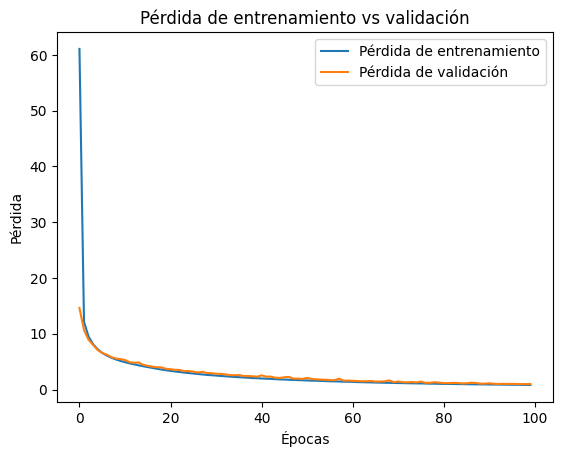

In [48]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 5 capas: 1 de normalización, 1 de salida, 3 capas ocultas con 64  neuronas cada una

In [49]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001
    epochs = 100
    Capas = 5
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    tf.keras.layers.Normalization
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))
    X_train[:1]

    M3 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
      ])

    M3.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.0001))

    history = M3.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=100)
    
    #Registrar metricas
    mlflow.keras.log_model(M3, "Modelo tres")
    loss = M3.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 170.9988 - val_loss: 16.9134
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.0012 - val_loss: 11.8413
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 11.1894 - val_loss: 9.7990
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.4445 - val_loss: 8.5733
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.1878 - val_loss: 7.7830
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.2974 - val_loss: 7.1585
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.7248 - val_loss: 6.7383
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.4527 - val_loss: 6.4678
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9686 - val_loss: 6.0513
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.5748 - val_loss: 5.9258
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.4178 - val_loss: 5.6060
Epoch 12/100


2024/12/02 15:19:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/02 15:21:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3733.6880


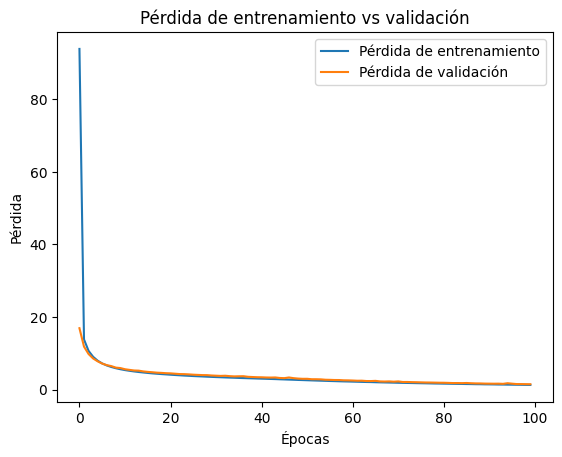

In [50]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 3 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 64  neuronas cada una

In [51]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001
    epochs = 100
    Capas = 3
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    tf.keras.layers.Normalization
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))
    X_train[:1]

    M4 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
      ])

    M4.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.0001))

    history = M4.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=100)
    
    #Registrar metricas
    mlflow.keras.log_model(M4, "Modelo 4")
    loss = M4.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 241.2746 - val_loss: 231.4362
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 226.9880 - val_loss: 206.9913
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 197.8769 - val_loss: 166.8772
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 154.1735 - val_loss: 117.2789
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 106.2730 - val_loss: 83.9811
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 78.7569 - val_loss: 66.3324
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 62.8224 - val_loss: 53.4590
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 50.7581 - val_loss: 44.8107
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 42.5753 - val_loss: 38.2498
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 36.0843 - val_loss: 32.9259
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 31.0513 - val_lo

2024/12/02 15:25:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/02 15:27:52 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\higut\AppData\Local\Temp\tmphb4erck5\model, flavor: keras). Fall back to return ['keras==3.5.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/02 15:27:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1041.6382


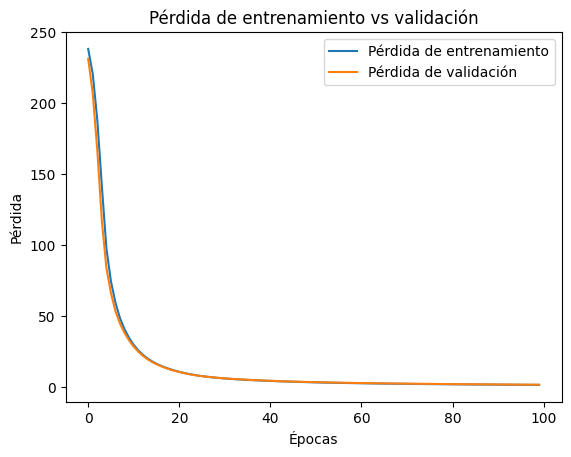

In [52]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 3 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 128  neuronas cada una

In [53]:
mlflow.set_experiment('Experimento con Neuronas')

2024/12/02 15:41:30 INFO mlflow.tracking.fluent: Experiment with name 'Experimento con Neuronas' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/higut/Downloads/Proyecto3/Repositoriopro3/mlruns/646173622831732049', creation_time=1733172090320, experiment_id='646173622831732049', last_update_time=1733172090320, lifecycle_stage='active', name='Experimento con Neuronas', tags={}>

In [54]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001
    epochs = 100
    Capas = 3
    Neuronas = 128  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    tf.keras.layers.Normalization
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))
    X_train[:1]

    M5 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    
    M5.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

    history = M5.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=100)

    
    #Registrar metricas
    mlflow.keras.log_model(M4, "Modelo 4")
    loss = M4.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 252s 81ms/step - loss: 240.6150 - val_loss: 224.2818
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 214.3680 - val_loss: 171.1191
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 151.5530 - val_loss: 97.1213
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 87.2069 - val_loss: 65.2108
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 59.9113 - val_loss: 47.6066
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 44.5775 - val_loss: 37.4030
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 34.5973 - val_loss: 29.8949
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 27.8540 - val_loss: 24.2870
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 22.5434 - val_loss: 20.0178
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.5678 - val_loss: 16.7945
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.7158 - val_los

2024/12/02 15:54:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/02 15:57:58 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\higut\AppData\Local\Temp\tmpy_pbvj5x\model, flavor: keras). Fall back to return ['keras==3.5.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/02 15:58:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1041.6382


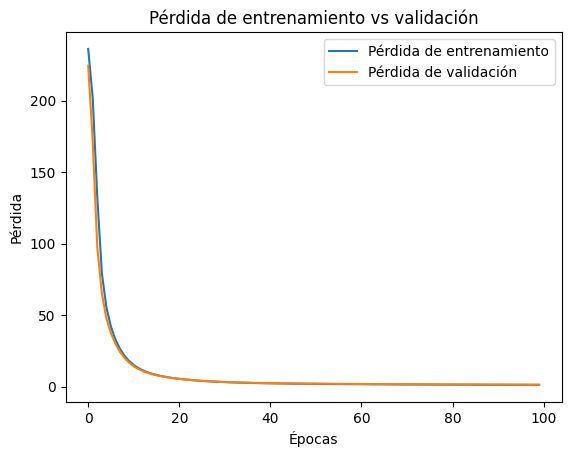

In [55]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 7 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 128  neuronas cada una

In [56]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001
    epochs = 100
    Capas = 3
    Neuronas = 128  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    tf.keras.layers.Normalization
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))
    X_train[:1]

    M6 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    
    M6.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

    history = M6.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=100)

    
    #Registrar metricas
    mlflow.keras.log_model(M4, "Modelo 4")
    loss = M6.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)


Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 94.3386 - val_loss: 10.6679
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.1826 - val_loss: 6.8730
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.3230 - val_loss: 5.5233
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.1379 - val_loss: 4.7128
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.3817 - val_loss: 4.3667
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.9806 - val_loss: 3.8633
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.6045 - val_loss: 3.8227
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.3406 - val_loss: 3.4040
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.1198 - val_loss: 3.3366
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.9708 - val_loss: 3.7564
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.8094 - val_loss: 2.9569
Epoch 12/100
154

2024/12/02 16:08:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/02 16:10:59 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\higut\AppData\Local\Temp\tmp4m652fzv\model, flavor: keras). Fall back to return ['keras==3.5.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/02 16:11:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 310s 41ms/step - loss: 3973.6584


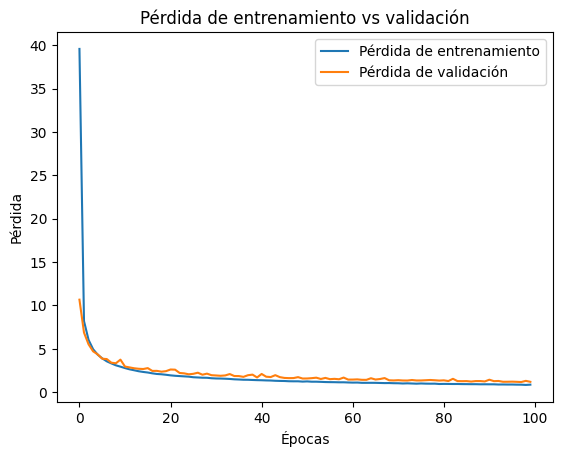

In [57]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [24]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(X_train))
X_train[:1]

M5 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


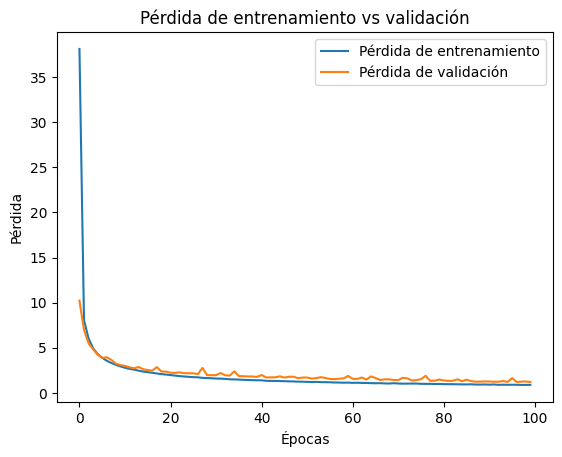

In [25]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()